In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/dprasanthkumar/Placement-Assignment_dasari_Prasanth_kumar/main/Python/4_meteorites.csv')

# Convert the 'year' column to datetime format
df['year'] = pd.to_datetime(df['year'], format='%Y-%m-%dT%H:%M:%S.%f', errors='coerce')



In [15]:
df

,name,id,nametype,recclass,mass (g),year,reclat,reclong,coordinates
0,Aachen,1,Valid,L5,NaN,1880-01-01,50.77500,6.08333,"[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,NaN,1951-01-01,56.18333,10.23333,"[10.23333, 56.18333]"
2,Abee,6,Valid,EH4,NaN,1952-01-01,54.21667,-113.00000,"[-113, 54.21667]"
3,Acapulco,10,Valid,Acapulcoite,NaN,1976-01-01,16.88333,-99.90000,"[-99.9, 16.88333]"
4,Achiras,370,Valid,L6,NaN,1902-01-01,-33.16667,-64.95000,"[-64.95, -33.16667]"
...,...,...,...,...,...,...,...,...,...
995,Tirupati,24009,Valid,H6,NaN,1934-01-01,13.63333,79.41667,"[79.41667, 13.63333]"
996,Tissint,54823,Valid,Martian (shergottite),NaN,2011-01-01,29.48195,-7.61123,"[-7.61123, 29.48195]"
997,Tjabe,24011,Valid,H6,NaN,1869-01-01,-7.08333,111.53333,"[111.53333, -7.08333]"
998,Tjerebon,24012,Valid,L5,NaN,1922-01-01,-6.66667,106.58333,"[106.58333, -6.66667]"


In [17]:
type('year')

str

In [18]:
# Get all Earth meteorites that fell before the year 2000
earth_meteorites_before_2000 = df[df['year'] < pd.Timestamp('2000-01-01')]

In [19]:
earth_meteorites_before_2000

,name,id,nametype,recclass,mass (g),year,reclat,reclong,coordinates
0,Aachen,1,Valid,L5,NaN,1880-01-01,50.77500,6.08333,"[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,NaN,1951-01-01,56.18333,10.23333,"[10.23333, 56.18333]"
2,Abee,6,Valid,EH4,NaN,1952-01-01,54.21667,-113.00000,"[-113, 54.21667]"
3,Acapulco,10,Valid,Acapulcoite,NaN,1976-01-01,16.88333,-99.90000,"[-99.9, 16.88333]"
4,Achiras,370,Valid,L6,NaN,1902-01-01,-33.16667,-64.95000,"[-64.95, -33.16667]"
...,...,...,...,...,...,...,...,...,...
994,Timochin,24004,Valid,H5,NaN,1807-01-01,54.50000,35.20000,"[35.2, 54.5]"
995,Tirupati,24009,Valid,H6,NaN,1934-01-01,13.63333,79.41667,"[79.41667, 13.63333]"
997,Tjabe,24011,Valid,H6,NaN,1869-01-01,-7.08333,111.53333,"[111.53333, -7.08333]"
998,Tjerebon,24012,Valid,L5,NaN,1922-01-01,-6.66667,106.58333,"[106.58333, -6.66667]"


In [20]:
# Get all Earth meteorites' coordinates that fell before the year 1970
earth_meteorites_coordinates_before_1970 = df[df['year'] < pd.Timestamp('1970-01-01')][['reclat', 'reclong']]

In [21]:
earth_meteorites_coordinates_before_1970

,reclat,reclong
0,50.77500,6.08333
1,56.18333,10.23333
2,54.21667,-113.00000
4,-33.16667,-64.95000
5,32.10000,71.80000
...,...,...
994,54.50000,35.20000
995,13.63333,79.41667
997,-7.08333,111.53333
998,-6.66667,106.58333


In [30]:
# Get all Earth meteorites with a mass greater than 10000 kg
earth_meteorites_mass_gt_10000kg = df[df['mass (g)'] > 10000 / 1000]  # Convert mass from g to kg


In [31]:
earth_meteorites_mass_gt_10000kg

,name,id,nametype,recclass,mass (g),year,reclat,reclong,coordinates


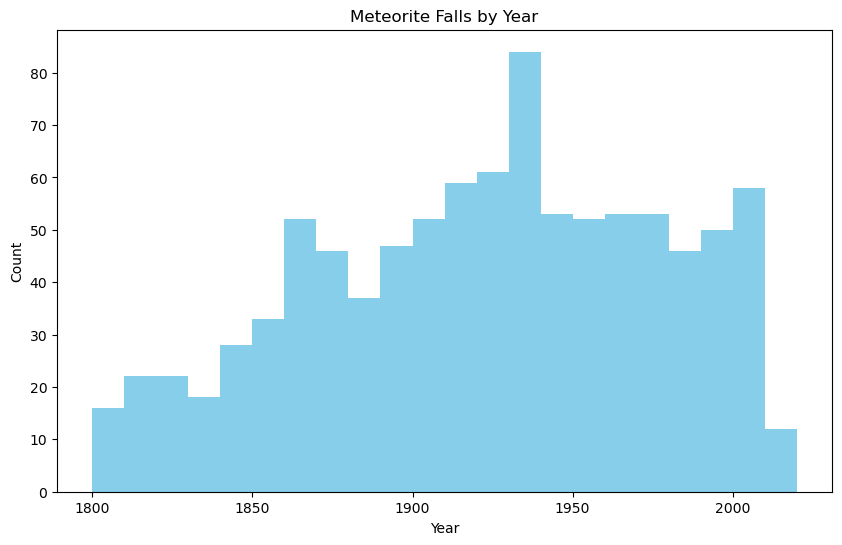

In [27]:
# Plotting the analysis

# 1. Histogram of meteorite falls by year
plt.figure(figsize=(10, 6))
plt.hist(df['year'].dt.year, bins=range(1800, 2023, 10), color='skyblue')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Meteorite Falls by Year')
plt.show()

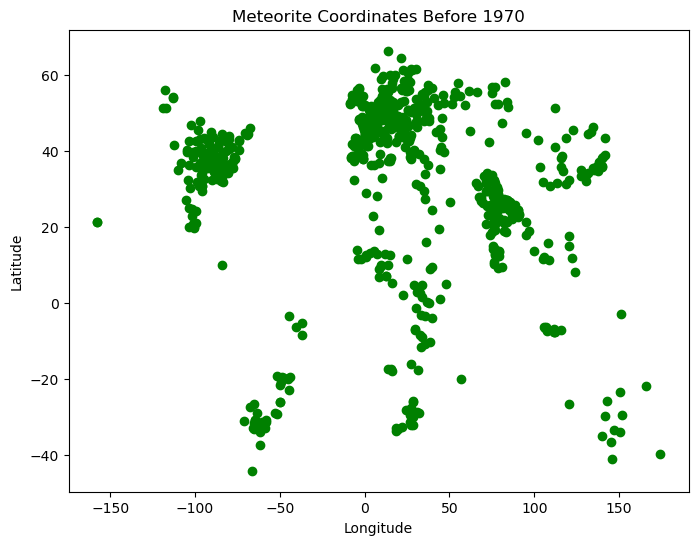

In [28]:
# 2. Scatter plot of meteorite coordinates before 1970
plt.figure(figsize=(8, 6))
plt.scatter(earth_meteorites_coordinates_before_1970['reclong'], earth_meteorites_coordinates_before_1970['reclat'], color='green')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Meteorite Coordinates Before 1970')
plt.show()


In [36]:
# 3. Bar plot of meteorites with mass > 10000 kg
if not earth_meteorites_mass_gt_10000kg.empty:
    # Plot the top 10 meteorite names with a count of mass > 10000kg
    plt.figure(figsize=(8, 6))
    earth_meteorites_mass_gt_10000kg.plot(kind='bar', color='orange')
    plt.xlabel('Meteorite Name')
    plt.ylabel('Count')
    plt.title('Top 10 Meteorite Names with Mass > 10000kg')
    plt.show()
else:
    print("No Earth meteorites found with a mass greater than 10000kg.")


No Earth meteorites found with a mass greater than 10000kg.
